<a href="https://colab.research.google.com/github/DaniyalK03/PML/blob/main/Letter_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework B

**Submission by SN: 21015796**

The following notebook is submitted coursework B for PHAS0056.

This notebook initally creates a function to add random "noise" to the pixel data of an imageset.

An initial neural network is set up such that a model is trained on the training MNIST data (images without noise) and then tested on the MNIST testing data with varying degrees of noise added for each test with the accuracy being observed.

This work is expanded upon to include multiple models trained on image data consisting of varying degrees of noise and testing each of these models against testing image data of varying degrees of noise (exceeding the noise ranges the models have been trained on).

The following code is adapted and structured similar to [1].

*Bibliography*

[1] R. Nichol, "Week3_MNIST_TF.ipynb", UCL, PHAS:0056, 2023

[2] OpenAI, "ChatGPT 3.5", 2023

In [ ]:
###############################################################################

# Importing necessary backend modules and libraries
# Same backend from [1]

import matplotlib.pyplot as plt
import numpy as np
import math

# Importing TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Setting up for later plotting
import matplotlib.style
import matplotlib as mpl
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=100 # Provides appropriate size for plots

In [ ]:
# Loading the image datasets
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalising datasets as pixels have values 0-255
train_images = train_images / 255.0
test_images = test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def add_noise(images, y_noise):

  '''
  Inputs: images = A dataset of images to add noise to
          y_noise = The maximum noise level to be added to images

  Outputs:noise_images_array = A normalised array containing the dataset of images with noise added

  This function takes an image dataset an adds a random contribution of noise that has been uniformly distributed from 0 to the maximum value of y_noise.
  The transformed noisy image set is normalised and returned in the same shape as the orginal image set
  '''

  noise = (np.linspace(0, y_noise, 100)) # Uniformly distribute noise from 0 to maximum value = y_noise
  noise_images_array = np.zeros_like(images, dtype=np.float64) # Initialise an empty array of the same form as original image array
  for i in range(len(images)):
    noise_images = images[i] + (np.random.choice(noise,size=images[i].shape)) # For each value of image dataset, add a random contribution from uniform noise ditribution. [2] Assistance to reshape array into suitable shape
    noise_images_array[i] = noise_images / np.max(noise_images) # Normalising the noisy image values so they are scaled simply from 0-1 and positioning into empty array
  return noise_images_array

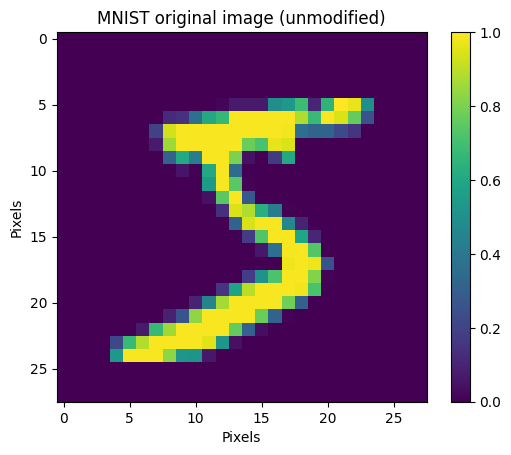

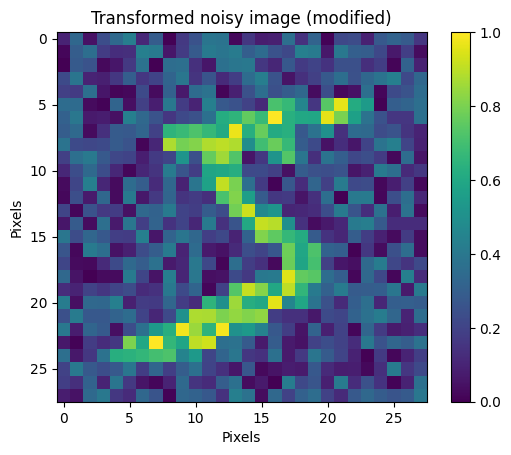

In [ ]:
# A test of MNIST training imageset with noise up to y_noise = 0.75 added
noisy_train_images = add_noise(train_images, 0.75)

# Example of a single image from the orginal unmodified image set
plt.title("MNIST original image (unmodified)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.imshow(train_images[0])
plt.colorbar();

# Example of a single noisy image from the now transformed noisy image set
plt.figure()
plt.title("Transformed noisy image (modified)")
plt.xlabel("Pixels")
plt.ylabel("Pixels")
plt.imshow(noisy_train_images[0])
plt.colorbar();

In the above cell, it can clearly be observed how the added noise contributions further visually complicate the image recognition process. With increasing maximum noise values used, it is obvious that the original image becomes much more difficult to visually discern.

In [ ]:
#Neural network set up and compiled as in example notebook [1]

# Set up neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])


# Setting up the loss function, optimser and metrics
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),metrics=['accuracy'])

In [ ]:
# Training on original MNIST training images with no noise contributions
history=model.fit(train_images, train_labels,batch_size=100, epochs=10) # Lowered number of epochs to 10 as beyond this point accuracy converged to 1 repeatedly

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3294 - accuracy: 0.9002
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9607
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0969 - accuracy: 0.9703
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0821 - accuracy: 0.9735
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9782
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9811
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0515 - accuracy: 0.9834
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9851
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9877
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0357 - accuracy: 0.9878

The final Epoch accuracy values indicate that the model performs with near perfect and occasionally perfect accuracy when tested over the same images it has been trained on. This is to be expected.

In [ ]:
#Testing on original MNIST testing images with no noise contributions

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.0979 - accuracy: 0.9741 - 423ms/epoch - 1ms/step


Even when tested over the unseen MNIST test imageset, the model performs with high accuracy (95+%).  

In [ ]:
def test_with_noise(model, testset, testlab, y_noise, graph=False):

  '''
  Inputs: model = The model that will be tested
          testset = Set of testing images, that will be modified by varying noises, used to test the model
          testlab = Set of labels to match to the associated testing images
          y_noise = Maximum value that noise contributions may reach when noise is added to image dataset
          graph = Optional parameter which plots the testing accuracy of each model against the maximum y_noise noise contribtution added

  Outputs:y_noise_array = Array of evenly spaced values up to maximum (y_noise), where at each point in the array the testing data is distorted with noise contributions up to that given noise level value.
          test_noise_accuracy = Array of the testing accuracy of the model when tested on an imageset with noise contributions up to the given y_noise_array value

This function takes a given model, dataset of testing images, associated image labels, and maximum y_noise that testing images should be distorted by.
The model is then tested repeatedly for accuracy with the testing image set that has been distorted to by noise contributions up to a value with the subsequent testing image set increasing the value noise contributions reach.
The final testing image set has an added maximum noise contribution level equal to the inputted y_noise value.
A graph to display how the testing accuracy of the model performs against these image datasets of varying degrees of noise can be displayed.
  '''

  y_noise_array = np.linspace(0, y_noise, 20) # Evenly spaces varying noise values so that at each point there can be a testing image set with noise contributions up to that value with a maximum value reached (y_noise)
  noise_image_array = np.zeros_like(testset, dtype=np.float64) # Initialise empty array of same shape as inputted image set to create for outputted noisy image set
  test_noise_acc_array = np.array([]) # Initialise empty array to have accuracy points at each associated testing noise level

  for i in range(len(y_noise_array)):
    noise_image_array[::] = add_noise(testset , y_noise_array[i]) # To the testing image set now repeatedly add noise contributions up to the specific noise level at that point in the overall noise testing array
    (test_noise_loss, test_noise_acc) = model.evaluate(noise_image_array,  test_labels, verbose=2); # Testing the model for accuracy and loss values at each image set with the specified noise contributions
    test_noise_acc_array = np.append(test_noise_acc_array, test_noise_acc) # Store the testing accuracy for the image set with that specified noise level for later plots

# Plotting and labelling
  if graph == True:
    plt.plot(y_noise_array, test_noise_acc_array, marker="o", label="Model trained on original data tested over noise") # Plot the accuracy when tested on image sets with noise contributions up to the associated level
    plt.title("Testing Accuracy vs Testing Noise for a model trained on no noise")
    plt.ylabel("Accuracy")
    plt.xlabel("$y_{noise}$")
    plt.legend(loc="best")
  else:
    print("End")

  return y_noise_array, test_noise_acc_array

313/313 - 0s - loss: 0.0979 - accuracy: 0.9741 - 309ms/epoch - 988us/step
313/313 - 0s - loss: 0.1302 - accuracy: 0.9607 - 309ms/epoch - 989us/step
313/313 - 0s - loss: 0.2968 - accuracy: 0.9063 - 303ms/epoch - 967us/step
313/313 - 0s - loss: 0.6474 - accuracy: 0.7829 - 438ms/epoch - 1ms/step
313/313 - 0s - loss: 1.1240 - accuracy: 0.6428 - 297ms/epoch - 950us/step
313/313 - 0s - loss: 1.6010 - accuracy: 0.5263 - 302ms/epoch - 964us/step
313/313 - 0s - loss: 2.0832 - accuracy: 0.4244 - 299ms/epoch - 955us/step
313/313 - 0s - loss: 2.5171 - accuracy: 0.3532 - 298ms/epoch - 953us/step
313/313 - 0s - loss: 2.9066 - accuracy: 0.2926 - 297ms/epoch - 948us/step
313/313 - 0s - loss: 3.2402 - accuracy: 0.2532 - 309ms/epoch - 988us/step
313/313 - 0s - loss: 3.5417 - accuracy: 0.2175 - 302ms/epoch - 965us/step
313/313 - 0s - loss: 3.8187 - accuracy: 0.1915 - 296ms/epoch - 946us/step
313/313 - 0s - loss: 4.0430 - accuracy: 0.1706 - 311ms/epoch - 994us/step
313/313 - 0s - loss: 4.2655 - accuracy: 

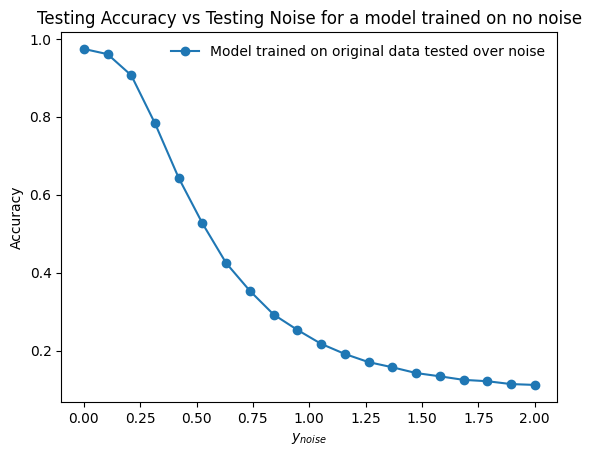

In [ ]:
# Testing model trained on original MNIST images over range of noises reaching maximum contributions up to y_noise = 2
test_with_noise(model, test_images, test_labels, 2, True);

As expected, the model reaches high testing accuracy when tested on the original MNIST testing images and when low levels of noise are added (contributions of up to y_noise = 0.25), however, there is a sharp decrease in testing accuracy once additions of noise contributions of y_noise = 0.50 and onwards are introduced. This implies that a model trained without noise generalises very poorly to tests conducted on image sets of moderate noise contributions and beyond.

In [ ]:
def train_with_noise(model_any, trainset, trainlab, y_noise1,y_noise2, testset, testlab):

  '''
  Inputs: model_any = Any neural network which is a model that needs to be trained
          trainset = Image set that varying degrees of noise will be added to (up to y_noise1), used to train the model
          trainlab = Labels to categorise the associated training image set
          y_noise1 = Maximum noise contributions to add to the training image set
          y_noise2 = Maximum noise contributions to add to the testing image set
          testset = Image set that varying degrees of noise will be added to (up to y_noise2), used to test the model
          testlab = Labels to categorise the associated testing image set

  Outputs:Plot to show how accurate are models trained on varying degrees of noise when tested across even greater varying degrees of noise

  This function will take a given model and train it with training image sets containing varying noise contributions up to a maximum level (y_noise1).
  These models will then be tested for accuracy using testing image sets containing varying noise contributions up to a maximum level (y_noise2).
  The accuracy for each model trained on an imageset at a given noise contribution level is plotted against given noise contribution level of testing imageset to observe how they performed.
  '''

  y_noise_array = np.linspace(0, y_noise1, 5) # 5 levels of noise contributions to each train a model on (maximum of y_noise1)
  for i in range(len(y_noise_array)):
    trainset_noise = add_noise(trainset, y_noise_array[i]) # Creates the associated training set with noise contributions for a given model
    model_any.fit(trainset_noise, trainlab,batch_size=100, epochs=10) # Training the model using that new noisy training set
    y_plot, point_plot = test_with_noise(model_any, testset, testlab, y_noise2) # Tests the model accuracy across testing imagesets with varying noise contributions up to a maximum (y_noise2)

    # Plotting and labelling
    plt.plot(y_plot, point_plot, marker = "o", label=f"Trained on noise = {y_noise_array[i]}") # Plotting the accuracy of how a given trained model performed across the varyingly noisy testing imagesets
    plt.title("Testing Accuracy vs Testing Noise for models trained on varying noise levels")
    plt.xlabel("$y_{noise}$")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
  return

In [ ]:
# Set up new neural network with random weights similar to example notebook [1]
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])


# Setting up the associated loss function, optimser and metrics

#model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),metrics=['accuracy'])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam",metrics=['accuracy'])

Compiling is possible using SGD from above yet "adam" was noted as being computationally more efficient hence why it has been used instead. The alternative has been provided as a code comment.

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 0.3375 - accuracy: 0.9069
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1544 - accuracy: 0.9555
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.1102 - accuracy: 0.9685
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0851 - accuracy: 0.9753
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0675 - accuracy: 0.9804
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9839
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0453 - accuracy: 0.9872
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9894
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0319 - accuracy: 0.9908
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0261 - accuracy: 0.9928

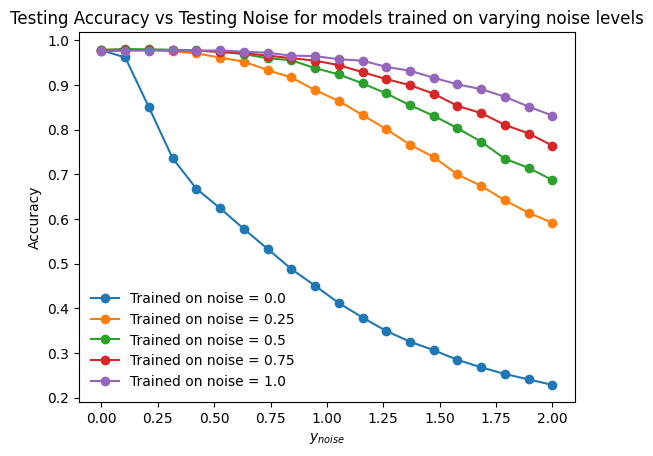

In [ ]:
# Training models up to maximum noise = 1.0 and testing over range up to maximum noise = 2.0 to determine how well each model generalises.

train_with_noise(model2, train_images, train_labels, 1, 2, test_images, test_labels)

Suppose we measure model performance as accuracy reached when tested on image sets with noise contributions outside that of the maximum training range.

It is then evident that as the training image sets comprise of increasing noise contributions, the generalistion ability of the associated model to image sets that have been previously unseen becomes superior.

For example, the model trained on noise contributions up to 1.0 performs equally as well at ranges 0.0 - 1.0 as other models that have also been trained in those ranges yet becomes much more accurate than other models when generalised and tested on image sets of noise contributions up to 2.0.

To conclude, it can be summised models perform vastly better when trained across ranges with noise contributions close to the testing image sets noise contributions. It also implies that models trained on image sets with high noise contributions will tend to perform better when fitted to real world data as real data would be similar to the testing image sets with high noise contributions.  